In [3]:
!pip3 install neattext

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import neattext.functions as nfx
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [5]:
df=pd.read_pickle("C:\\Users\\navya\\Desktop\\MINI PROJECT\\Twitter-Emotion-Recognition-main\\Dataset\\merged_training.pkl")
df

,text,emotions
27383,i feel awful about it too because it s my job ...,sadness
110083,im alone i feel awful,sadness
140764,ive probably mentioned this before but i reall...,joy
100071,i was feeling a little low few days back,sadness
2837,i beleive that i am much more sensitive to oth...,love
...,...,...
566,that was what i felt when i was finally accept...,joy
36236,i take every day as it comes i m just focussin...,fear
76229,i just suddenly feel that everything was fake,sadness
131640,im feeling more eager than ever to claw back w...,joy


In [11]:
df.head()

,tweet_id,sentiment,content
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,wants to hang out with friends SOON!
4,1956968416,neutral,@dannycastillo We want to trade with someone w...


In [7]:
df['emotions'].value_counts()

joy         141067
sadness     121187
anger        57317
fear         47712
love         34554
surprise     14972
Name: emotions, dtype: int64

<Axes: xlabel='emotions', ylabel='count'>

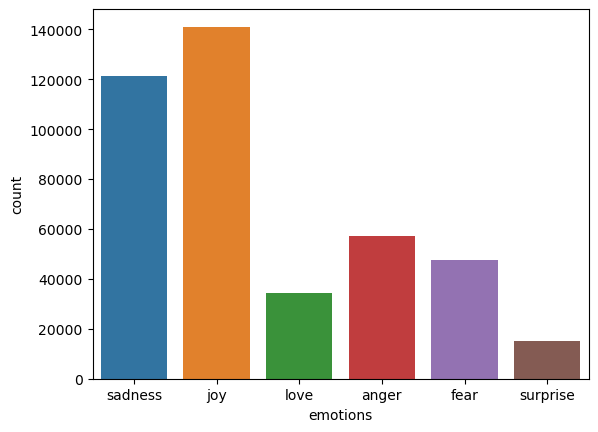

In [8]:
# Plot
sns.countplot(x='emotions',data=df,width=0.8)

In [9]:
# Data Cleaning
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [11]:
df['Clean_Text']=df['text'].apply(nfx.remove_userhandles)

In [12]:
# Stopwords
df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_stopwords)

In [13]:
df

,text,emotions,Clean_Text
27383,i feel awful about it too because it s my job ...,sadness,feel awful job position succeed happen
110083,im alone i feel awful,sadness,im feel awful
140764,ive probably mentioned this before but i reall...,joy,ive probably mentioned feel proud actually kee...
100071,i was feeling a little low few days back,sadness,feeling little low days
2837,i beleive that i am much more sensitive to oth...,love,beleive sensitive peoples feelings tend compas...
...,...,...,...
566,that was what i felt when i was finally accept...,joy,felt finally accepted bulgarian conservatorie ...
36236,i take every day as it comes i m just focussin...,fear,day comes focussing eating better moment aimin...
76229,i just suddenly feel that everything was fake,sadness,suddenly feel fake
131640,im feeling more eager than ever to claw back w...,joy,im feeling eager claw went pear shaped week track


In [14]:
# Features & Labels
Xfeatures = df['Clean_Text']
ylabels = df['emotions']

In [15]:
#  Split Data
x_train,x_test,y_train,y_test = train_test_split(Xfeatures,ylabels,test_size=0.3,random_state=42)

In [16]:
# Build Pipeline
from sklearn.pipeline import Pipeline

In [17]:
# LogisticRegression Pipeline
pipe_lr = Pipeline(steps=[('cv',CountVectorizer()),('lr',LogisticRegression())])

In [18]:
# Train and Fit Data
pipe_lr.fit(x_train,y_train)

C:\Users\navya\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [19]:
pipe_lr

Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [20]:
# Check Accuracy
pipe_lr.score(x_test,y_test)

0.8887982534008301

In [28]:
ex1 = "I love my mother"
pipe_lr.predict([ex1])

array(['joy'], dtype=object)

In [29]:
# Prediction Prob
pipe_lr.predict_proba([ex1])

array([[0.27186167, 0.10659046, 0.30892301, 0.02846867, 0.27754589,
        0.0066103 ]])

In [24]:
# To Know the classes
pipe_lr.classes_

array(['anger', 'fear', 'joy', 'love', 'sadness', 'surprise'],
      dtype=object)

In [67]:
import pickle
pipeline_file = open("emotion_classifier_pipe_lr_03_june_2021.pkl","wb")
pickle.dump(pipe_lr,pipeline_file)
pipeline_file.close()